In [4]:
import numpy as np
import matplotlib.pyplot as plt

from algorithms.NSGA2 import nsga2
import algorithms.NSGA2.evolutionary_operators as nsga2_operators

from algorithms.risk_measures import semi_variance

from data_loader import load_stock_quotations

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

# Reading data

In [5]:
stock_quotations = load_stock_quotations()

delta_t = 90
stock_returns = stock_quotations.xs('close', level=1, axis=1).pct_change()
last_returns = stock_returns[-delta_t-1:-1]

stock_returns_mean = last_returns.mean() # predicted return for next day

# variance as risk
stock_returns_var = last_returns.var() # risk
stock_returns_cov = last_returns.cov() # covariance matrix

# semi-variance as risk
stock_returns_semi_var = semi_variance(np.array(last_returns).T)

number_of_stocks = stock_returns.shape[1]

# Objective function

In [6]:
def portfolio_return_value(X):
    return X @ stock_returns_mean


def portfolio_risk_var(X):
    return np.diag(X @ stock_returns_cov @ X.T)


def portfolio_risk_semi_var(X):
    return semi_variance(X @ np.array(last_returns).T)


def portfolio_objective_function(risk_function=portfolio_risk_semi_var,
                                 return_function=portfolio_return_value):
    return lambda X: np.c_[risk_function(X), -return_function(X)]

# Tests

In [7]:
def show_results(stock_risk=stock_returns_semi_var,
                 objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
                 **kwargs):
    plt.xlabel('Risk')
    plt.ylabel('Return')
    plt.scatter(stock_risk, stock_returns_mean, c='b')

    nsga2_result = nsga2(objective_function=objective_function,
                         chromosome_length=number_of_stocks,
                         **kwargs)

    pareto_front = objective_function(nsga2_result)
    plt.scatter(pareto_front[:,0], -pareto_front[:,1], c='r')
    plt.legend(['Basic stocks', 'Pareto front'])
    plt.show()

### Variance as risk measure

NSGA-II: 100%|██████████| 100/100 [00:29<00:00,  3.35it/s]


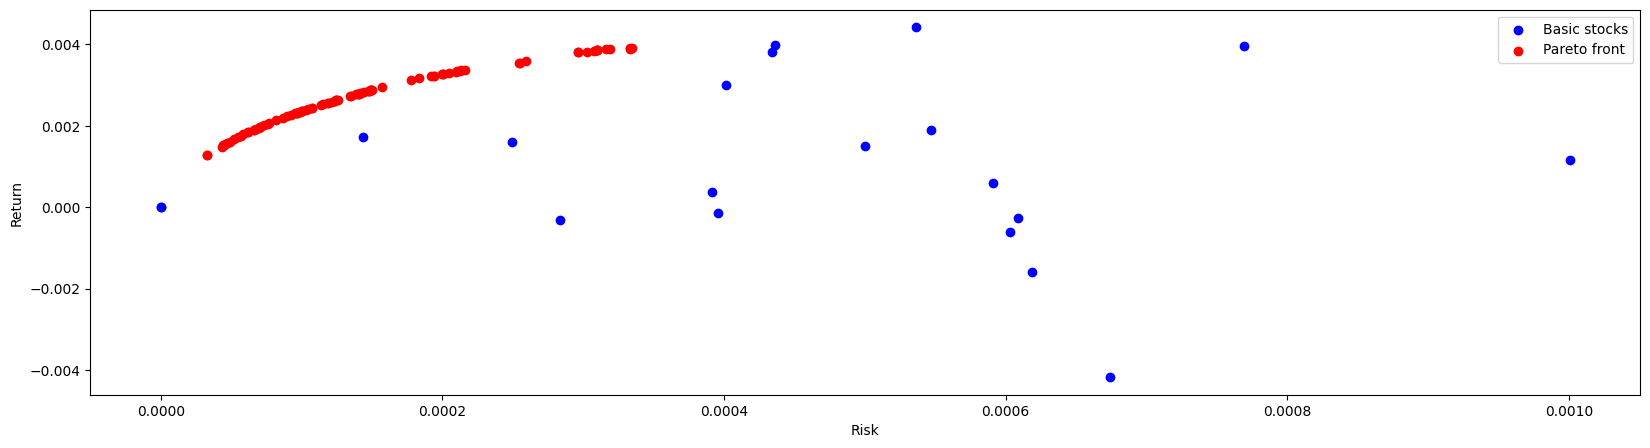

In [8]:
show_results(stock_risk=stock_returns_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_var),
             population_size=100,
             number_of_offspring=200,
             number_of_iterations=100)

NSGA-II: 100%|██████████| 300/300 [05:26<00:00,  1.09s/it]


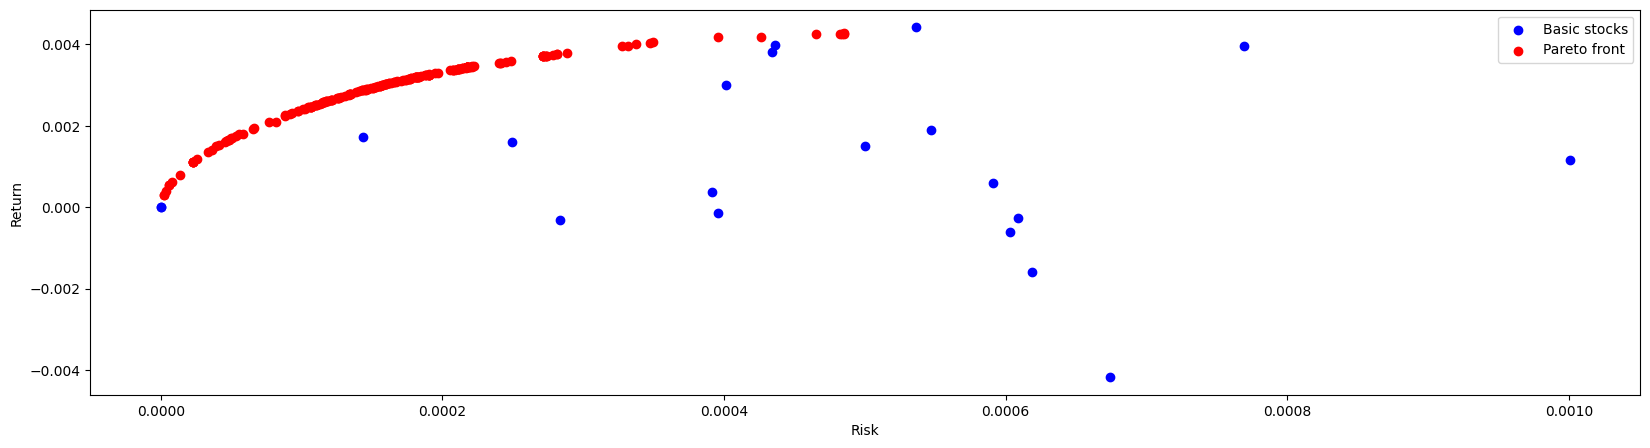

In [9]:
show_results(stock_risk=stock_returns_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=300)

### Semi-variance as risk measure

NSGA-II: 100%|██████████| 300/300 [01:32<00:00,  3.25it/s]


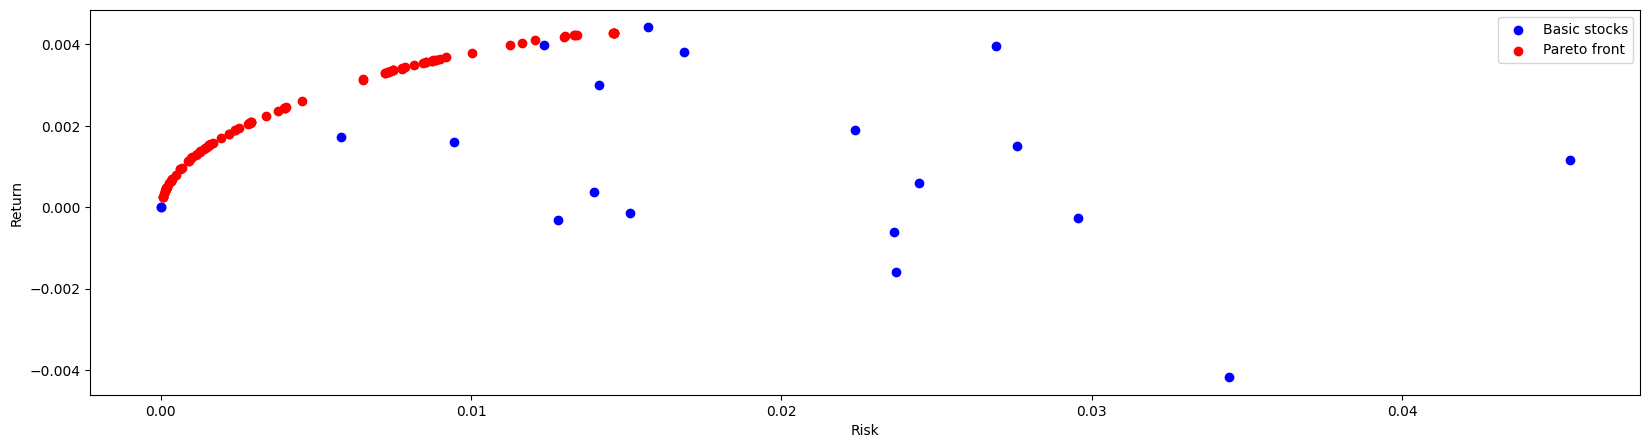

In [10]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=100,
             number_of_offspring=200,
             number_of_iterations=300)

NSGA-II: 100%|██████████| 400/400 [15:32<00:00,  2.33s/it]


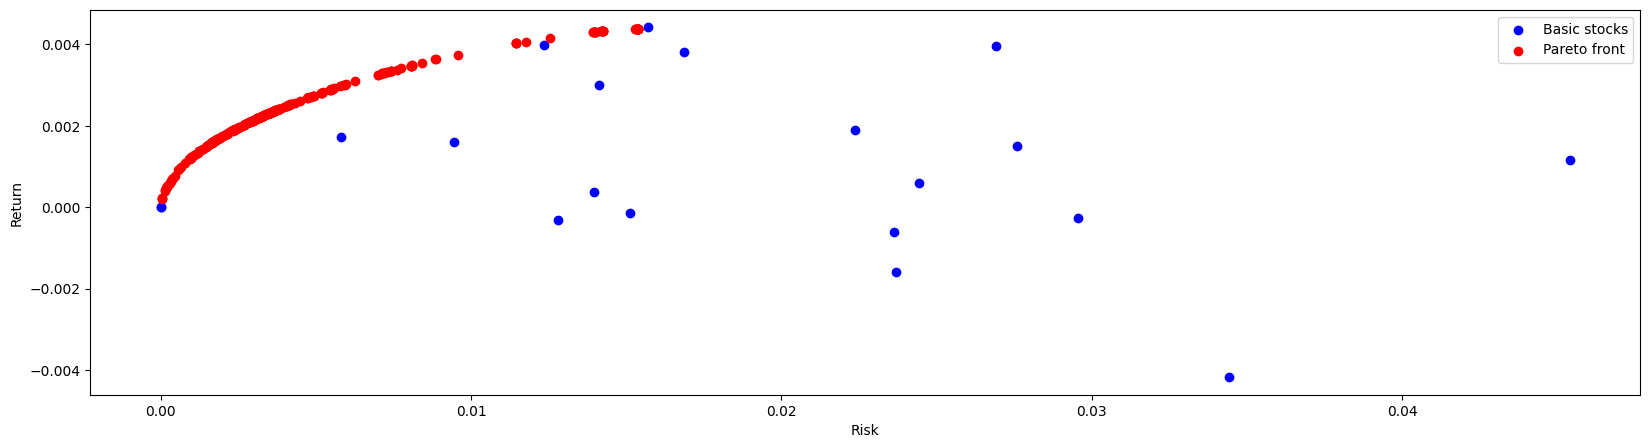

In [11]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=300,
             number_of_offspring=600,
             number_of_iterations=400)

##### Changing alpha parameter

NSGA-II: 100%|██████████| 400/400 [07:05<00:00,  1.06s/it]


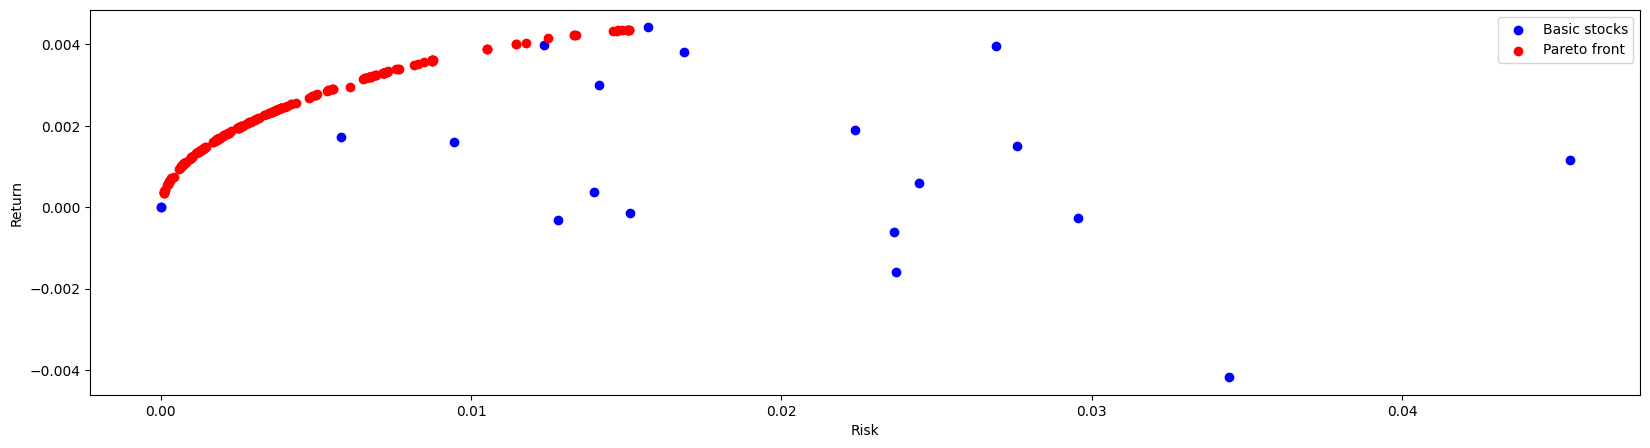

In [12]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=400,
             alpha=0.5)

NSGA-II: 100%|██████████| 400/400 [07:02<00:00,  1.06s/it]


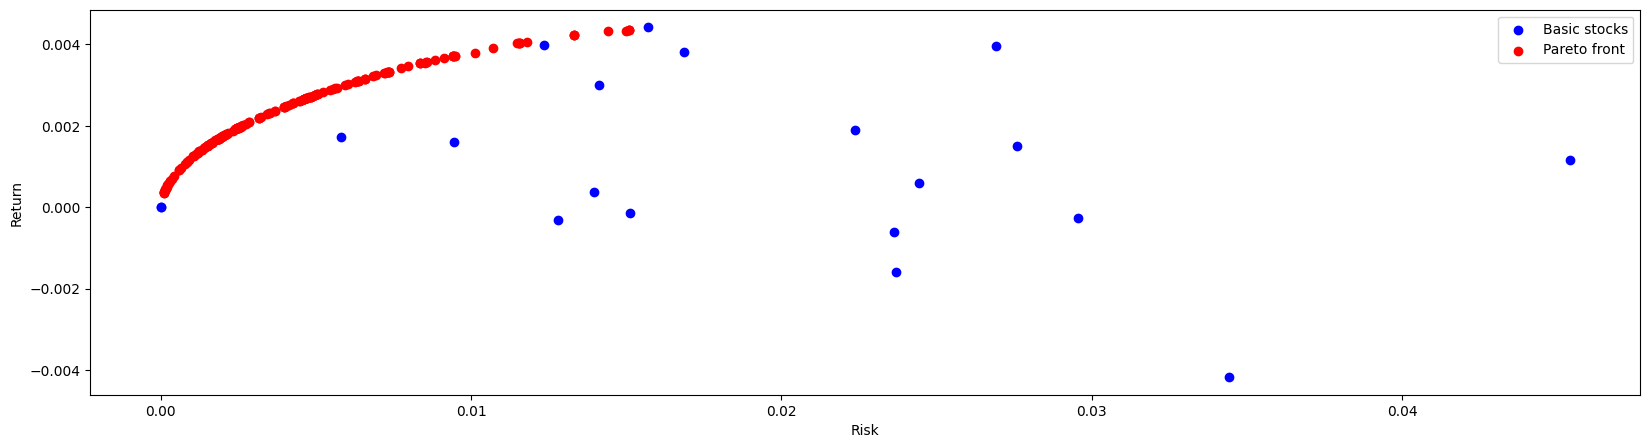

In [13]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=400,
             alpha=0.75)

NSGA-II: 100%|██████████| 400/400 [06:58<00:00,  1.05s/it]


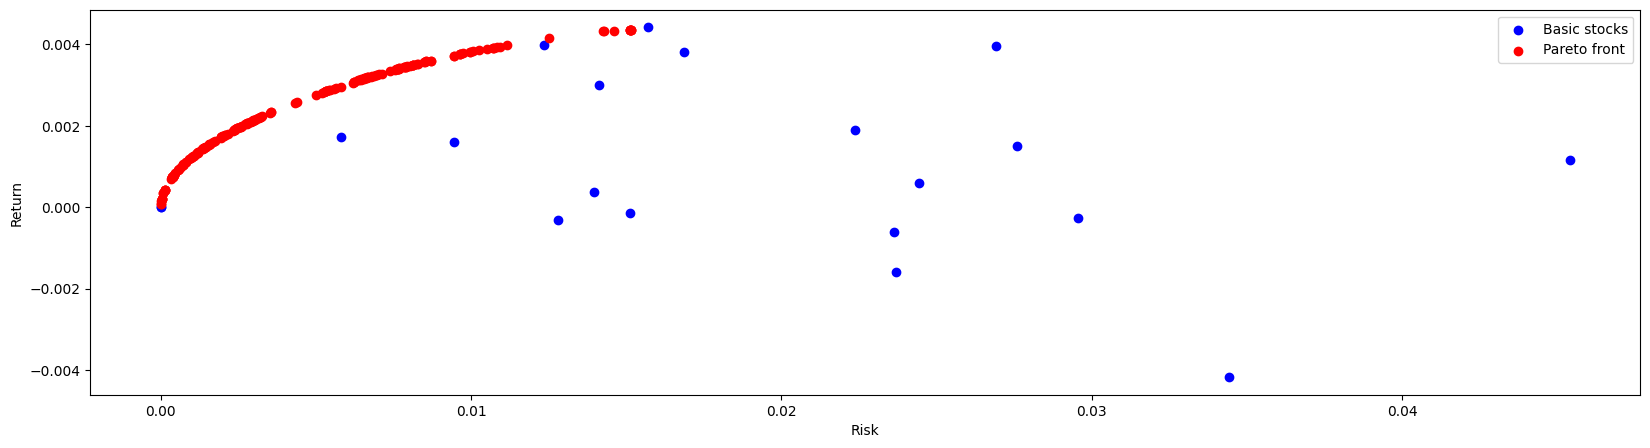

In [14]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=400,
             alpha=0.25)

##### Swap mutation

NSGA-II: 100%|██████████| 400/400 [06:57<00:00,  1.04s/it]


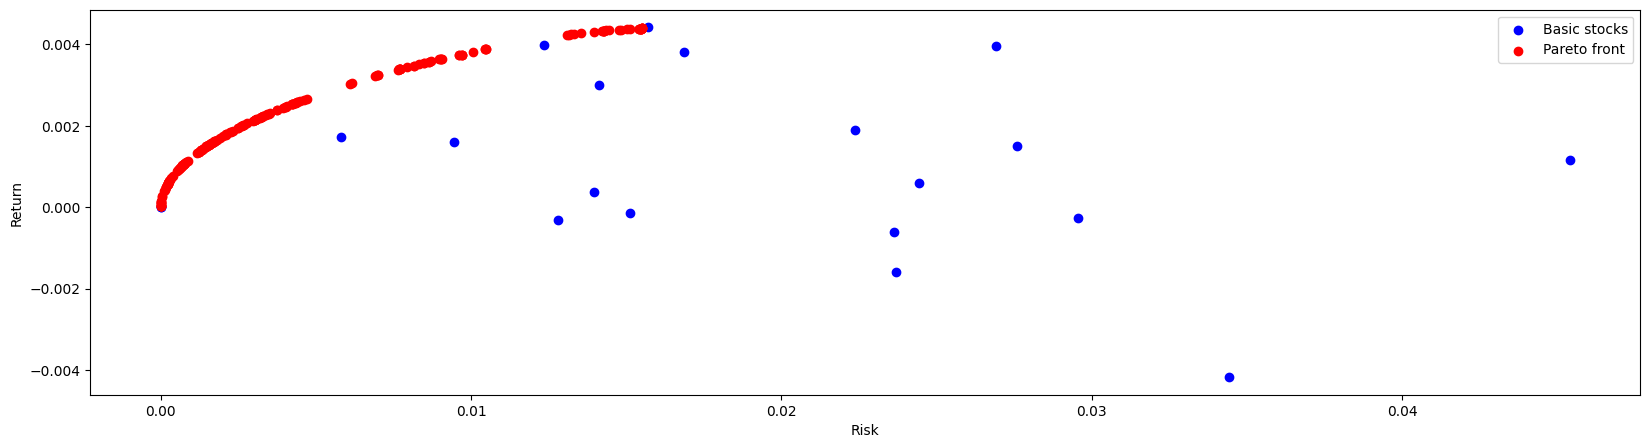

In [15]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=400,
             mutation_operator=nsga2_operators.swap_mutation,
             alpha=0.5)

NSGA-II: 100%|██████████| 400/400 [07:04<00:00,  1.06s/it]


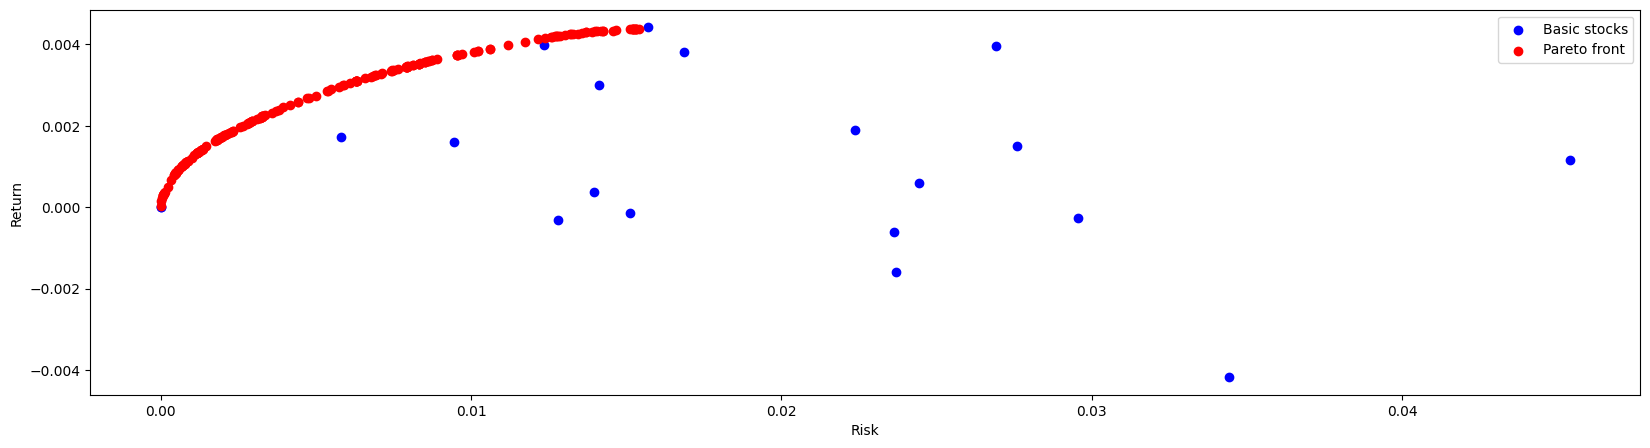

In [16]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=400,
             mutation_operator=nsga2_operators.swap_mutation,
             alpha=0.75)

NSGA-II: 100%|██████████| 400/400 [07:00<00:00,  1.05s/it]


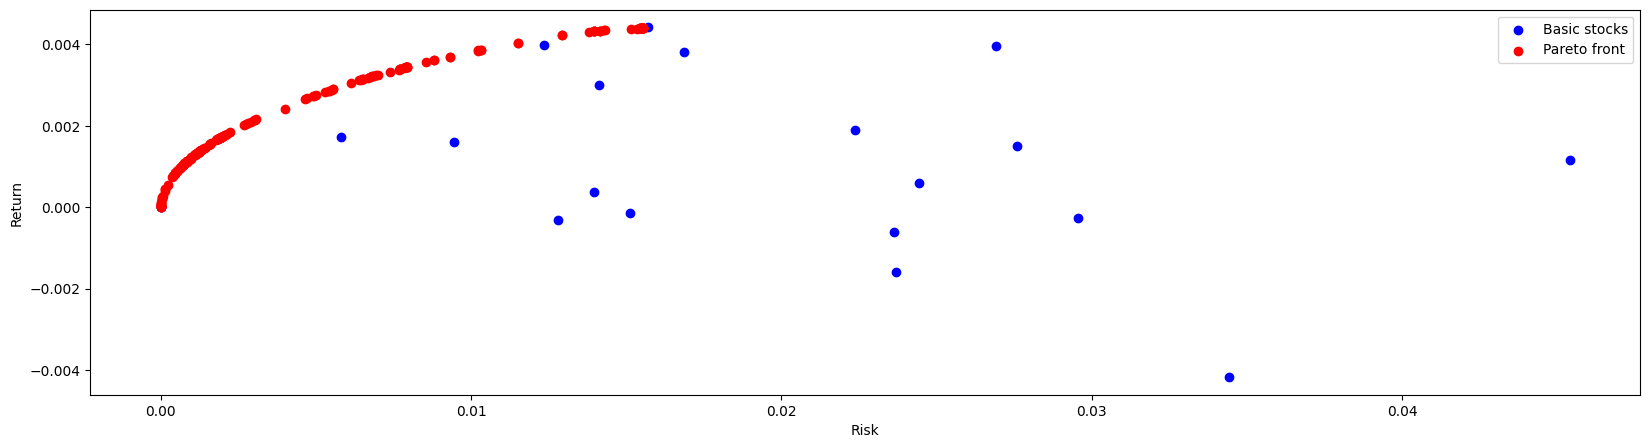

In [17]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=400,
             mutation_operator=nsga2_operators.swap_mutation,
             alpha=0.25)

##### Differential crossover

NSGA-II: 100%|██████████| 400/400 [06:59<00:00,  1.05s/it]


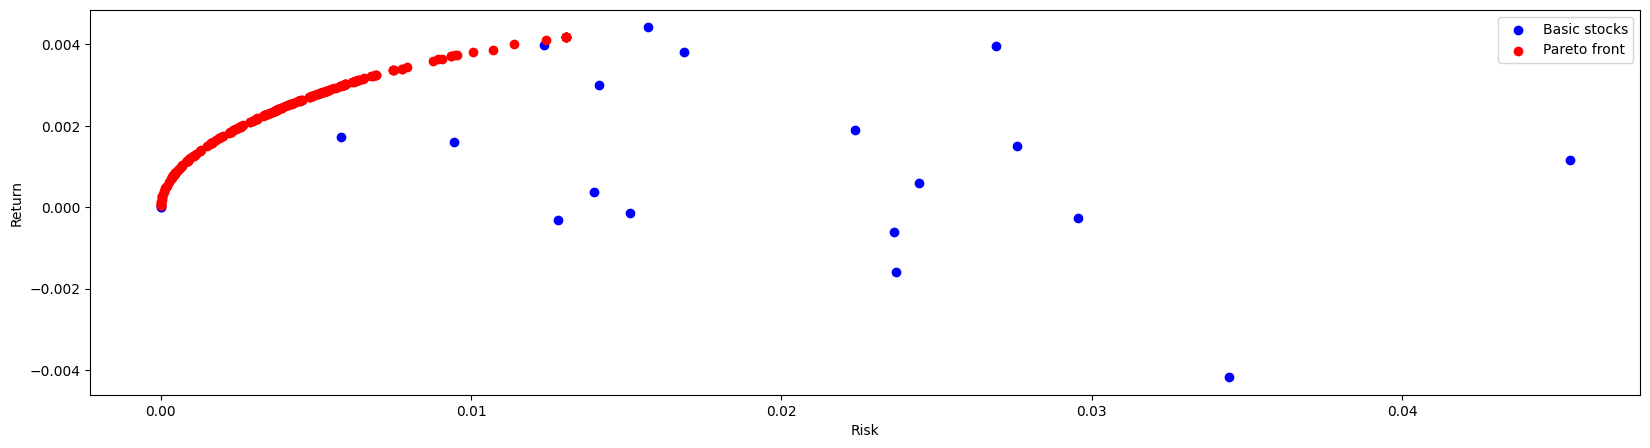

In [18]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=400,
             crossover_operator=nsga2_operators.differential_crossover(0.5),
             alpha=0.75)

NSGA-II: 100%|██████████| 400/400 [09:32<00:00,  1.43s/it]


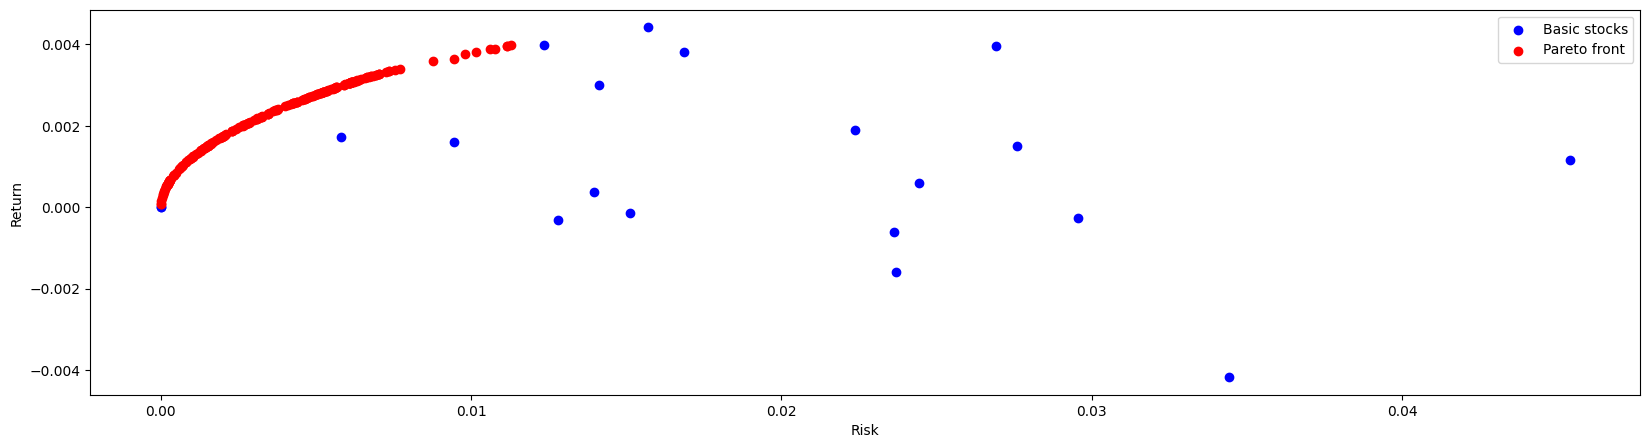

In [19]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=400,
             crossover_operator=nsga2_operators.differential_crossover(),
             mutation_operator=nsga2_operators.swap_mutation,
             alpha=0.75)

NSGA-II: 100%|██████████| 400/400 [15:10<00:00,  2.28s/it]


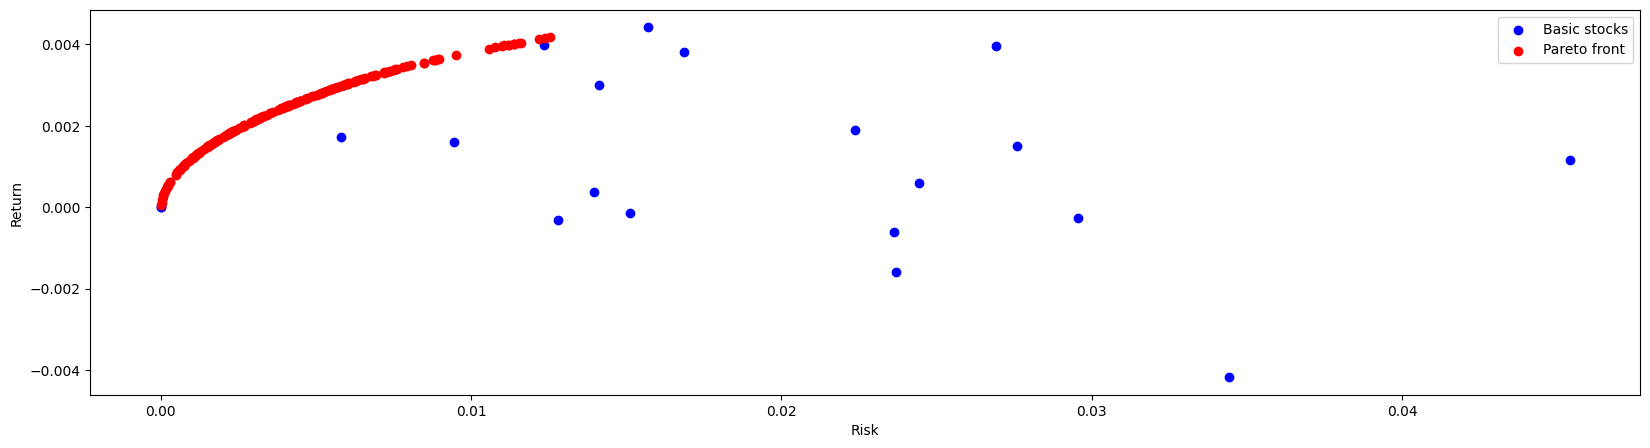

In [20]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=400,
             crossover_operator=nsga2_operators.differential_crossover(0.25),
             mutation_operator=nsga2_operators.swap_mutation,
             alpha=0.75)

NSGA-II: 100%|██████████| 400/400 [12:40<00:00,  1.90s/it]


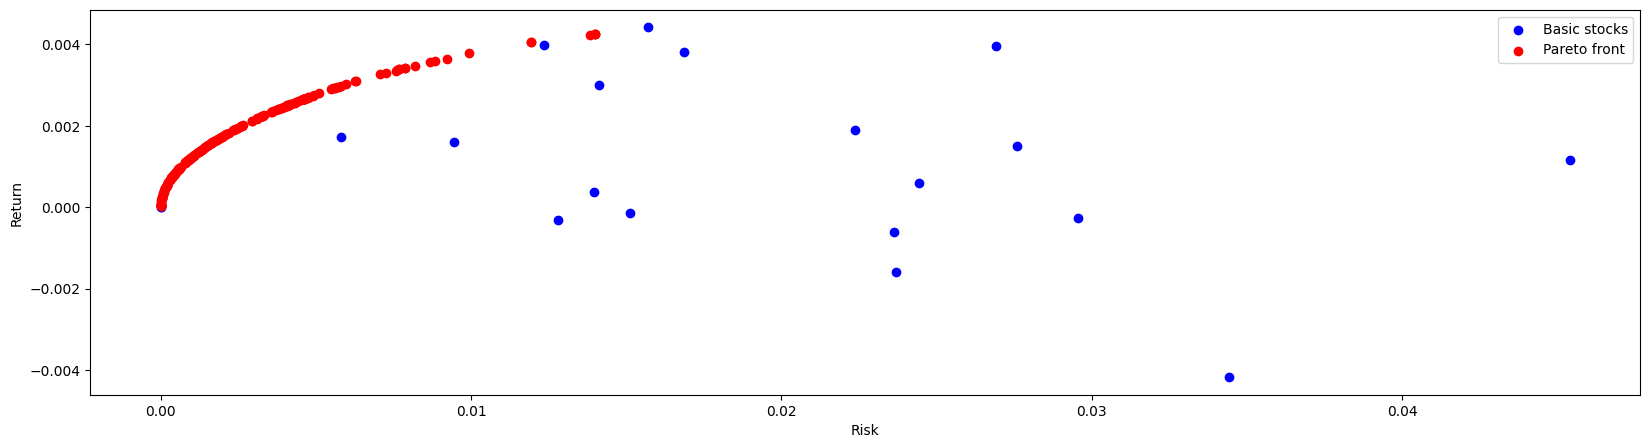

In [21]:
show_results(stock_risk=stock_returns_semi_var,
             objective_function=portfolio_objective_function(risk_function=portfolio_risk_semi_var),
             population_size=200,
             number_of_offspring=400,
             number_of_iterations=400,
             crossover_operator=nsga2_operators.differential_crossover(0.75),
             mutation_operator=nsga2_operators.swap_mutation,
             alpha=0.75)